## Importing required Libraries and dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('1613615-Stock_Price_data_set.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.shape

(1009, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
#Converting object datatype to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
print(f'DataFrame contains information from {df.Date.min()} to {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} Days')

DataFrame contains information from 2018-01-03 00:00:00 to 2022-12-01 00:00:00
Total days = 1793 Days


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


## EDA

In [9]:
df1 = df.copy()

In [10]:
df1.set_index('Date',inplace=True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-02,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-06-02,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-07-02,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-08-02,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-09-02,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


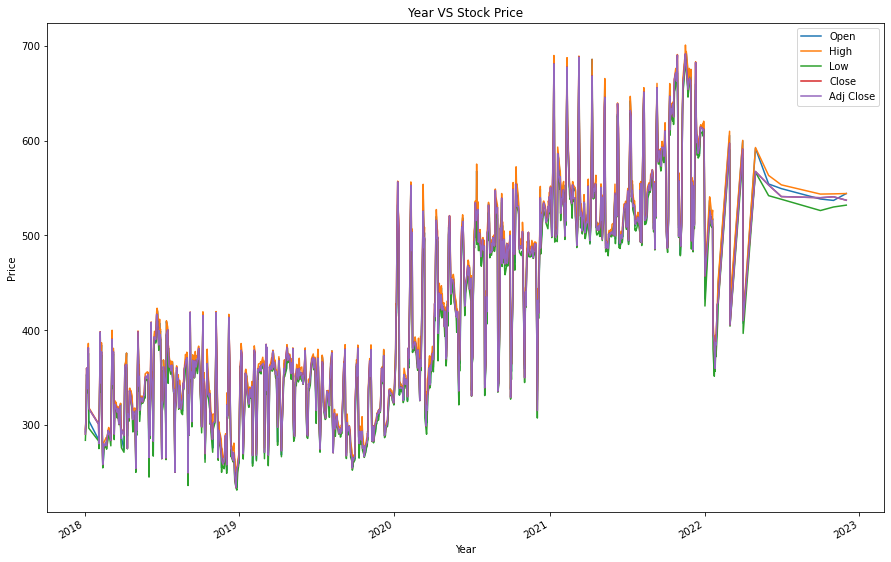

In [11]:
x = df1.drop('Volume',axis=1)
for feature in x:
    df1[feature].plot(figsize=(15,10))
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Year VS Stock Price')

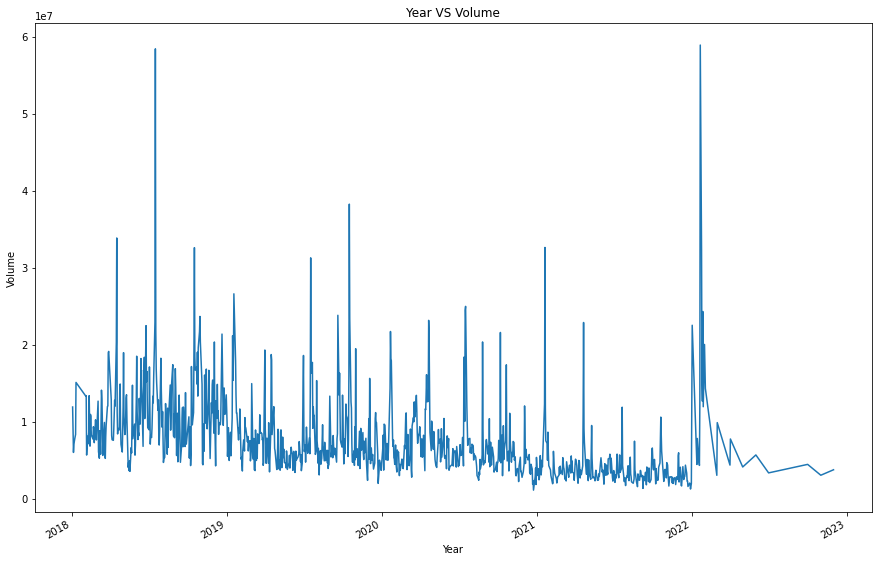

In [12]:
df1['Volume'].plot(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Year VS Volume')
plt.show()

## Checking for outliers

<AxesSubplot:>

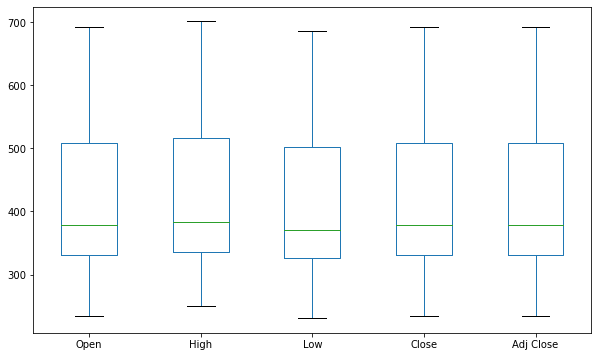

In [13]:
df1[['Open','High','Low','Close','Adj Close']].plot(kind='box',figsize=(10,6))

## Implementing ML model 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['Date','Close'],axis=1)
y = df.Close

In [16]:
#Spliting data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.score(X_test,y_test)

1.0

In [22]:
lr.predict([[302.85,316.88,297.6,315,18986100]])

array([315.])